### Part A for Medical Insurance Dataset

#### Task for the Dataset

* 1. Is the required ML supervised, unsupervised, or semi supervised learning and why? Which ML task (classification, clustering, regression analysis or any other) is the best in this case and why? 

* 2. Explore your data and document your observation.

* 3. Study the correlation between each predictor and the medicalCost. What is your conclusion?

* 4. Use the correlation analysis to select 3 best predictors and build a simple linear regression model based on each of the predictors.

* 5. Evaluate the performance with the statistical performance measures to evaluate the statistical significance of your results.

* 6. Build two multivariate regression models (1) with the three predictors above and (2) with all
the predictors in the dataset. Evaluate and compare the two models.

* 7. State your overall conclusions for this task.

### 1. Importing Dataset

In [1]:
# Import Libraries for the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import dataset & have a view
Medical_Insurance = pd.read_csv('insurance.csv')

In [3]:
# View of the dataset
Medical_Insurance.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1a:

The given dataset is a SUPERVISED LEARNING

It can be seen that the dataset comprises of six(6) independent variables and one dependent variable (medicalCost), also known as the target or output.
This target is a continuous variable which is dependent on the other six columns which are well labelled. Since the end goal for the dataset is to produce the target which is the medicalCost, then we can conclude from the view it that it's a supervised learning ML.

## 1b

The best ML model to use in the above dataset is Regression Analysis.

This is because the output or the target column is a continuous value which is also demendent on the independent columns.

## 2. Data Exploration

In [4]:
# Shape of the dataset
print('Shape of the Medical Insurance Dataset: ', Medical_Insurance.shape)

Shape of the Medical Insurance Dataset:  (1338, 7)


In [5]:
# Columns of the dataset and properties 
Medical_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# The statistical summary of the dataset
Medical_Insurance.describe()

,age,bmi,children,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* The average age, bmi, children, medicalCost are 39, 30.6, 1, and 13270.4 respectively
* The minimum values are also indicated above to be 18, 15.96, 0, 1121.87 respectively
* The maximum values are also indicated above to be 64, 53.1, 5, 63770.43 respectively

In [7]:
# Checking for missing values 
Medical_Insurance.isna().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
medicalCost    0
dtype: int64

There are no missing nor empty values

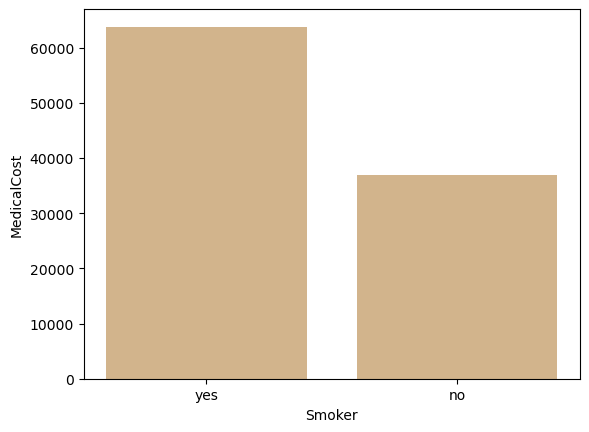

In [8]:
# Effect of Smoker on Cost of Insurance
plt.bar(x = Medical_Insurance.smoker, height=Medical_Insurance.medicalCost, color= 'tan')
plt.xlabel('Smoker')
plt.ylabel('MedicalCost');

From the chart above, it is seen that the 'smoker' predictor has a significant impact on the medicalCost. People that smokes tends to pay higher medicalCost than people that don't smoke.

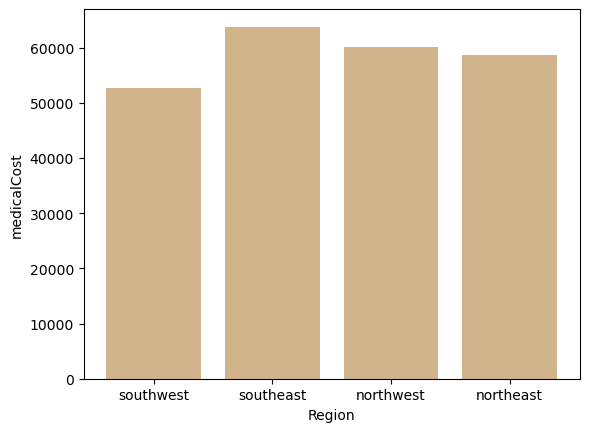

In [9]:
# Effect of Region on Medical Cost
plt.bar(x = Medical_Insurance.region, height=Medical_Insurance.medicalCost, color = 'tan')
plt.xlabel('Region')
plt.ylabel('medicalCost');

From the barchart above, it is seen that the people from southeast region pays most amount of medicalCost, then follow by northwest, northeast, and southeast coming as the least region with medicalCost.
Nontheless, it can be seen that the region has little or no impact when determining the cost of medical Insurance.

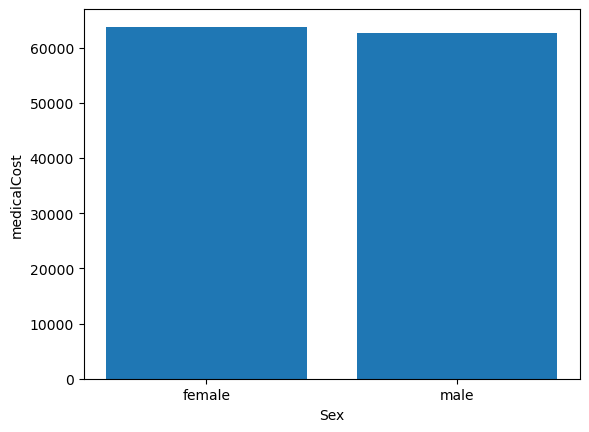

In [10]:
# Sex on Cost of Medical Insurance 
plt.bar(x = Medical_Insurance.sex, height=Medical_Insurance.medicalCost)
plt.xlabel('Sex')
plt.ylabel('medicalCost');

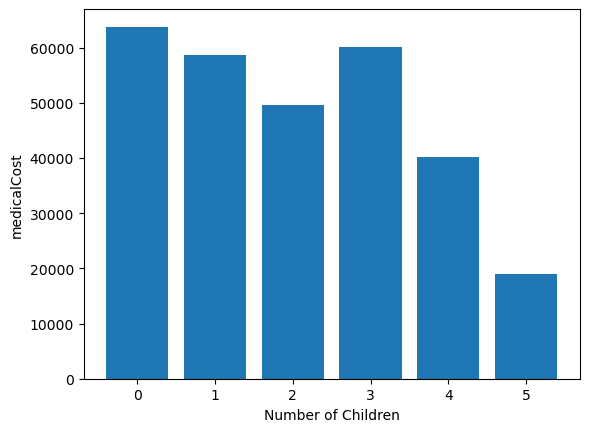

In [11]:
plt.bar(x = Medical_Insurance.children, height=Medical_Insurance.medicalCost)
plt.xlabel('Number of Children')
plt.ylabel('medicalCost');

It can be seen that the medicalCost is inversely proportional to the number of children

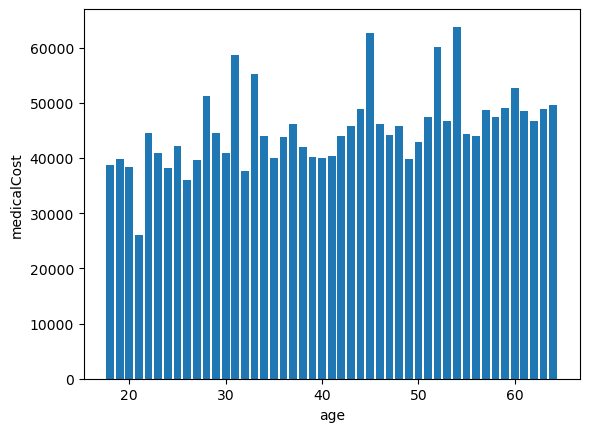

In [12]:
plt.bar(x = Medical_Insurance.age, height=Medical_Insurance.medicalCost)
plt.xlabel('age')
plt.ylabel('medicalCost');

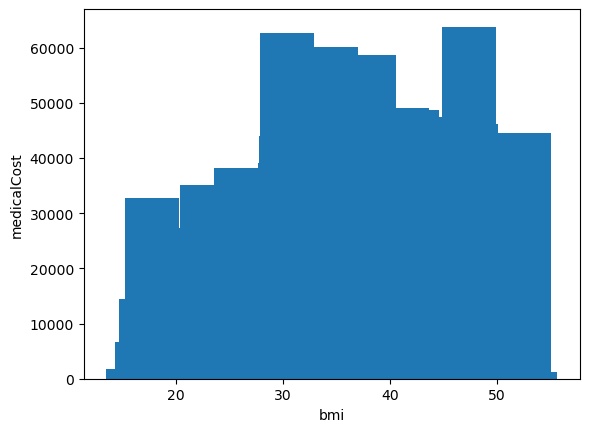

In [13]:
plt.bar(x = Medical_Insurance.bmi, height=Medical_Insurance.medicalCost, width=5, linewidth= 12)
plt.xlabel('bmi')
plt.ylabel('medicalCost');

## 3a. Predictors vs target

From the above dataset, it can be seen that the medicalCost varies according to the variation in the columns. For example, the smoker column, the people that smokes tends to have high medicalCost Insurance than people that don't smoke. To visibly check the effect of all these independent columns, we need to do a correlation table to view the effect of each columns to the medicalCost.
To check the effect of this columns collectively, this will be visible on heatmap.

#### 

In the advent to get the effect of each independent column on the dependent output, some of the columns that are categorical need to be converted into numerical column

Categorical columns like sex, smoker, and region are needed to be converted into numerical column in order to get the actual correlation to the output

In [14]:
# Changing the categorical data to numerical data

for col in Medical_Insurance:
    if Medical_Insurance[col].dtype == 'O':
        sd = Medical_Insurance[col].astype('category')
        sd1 = sd.cat.codes
        Medical_Insurance[col] = sd1

In [15]:
Medical_Insurance.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## 4. Plotting a heatmap which shows the correlation of all the predictors (columns)

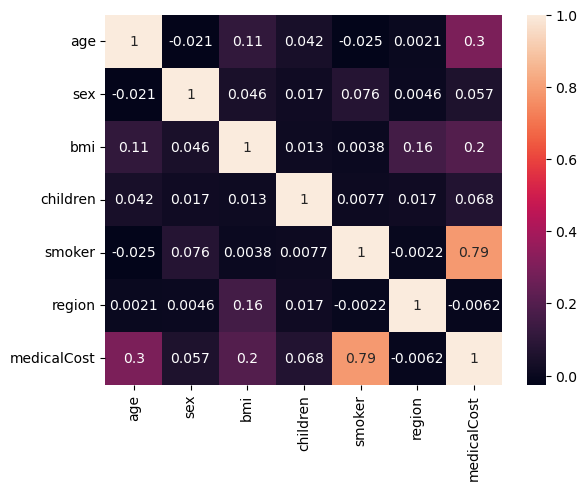

In [16]:
# Correlation map using heatmap
Medical_Insurance_corr = Medical_Insurance.corr()
sns.heatmap(Medical_Insurance_corr, annot=True);

From the above correlation chart, considering the correlation between each predictors and the medicalCost column, it can been seen that the predictor that has the highest value is the "Smoker" column with a value of 0.79. While the least correlated column is the region column with a value of -0.0062. 

In conclusion, the smoker predictor is highly positvely correlated to the medicalCost, meaning that it is a key determinant. In order of correlation, the predictors are listed below:


* smoker (0.79)
* age (0.3)
* bmi (0.2)
* children (0.068)
* sex (0.057)
* region (-0.0062)

From the list above, the order of high correlation in decending order is smoker, age, bmi, children, sex, region.

### 4a. Selecting the best three Predictors

From the correlation list above, the best tree predictors can be listed as follows:

* smoker
* age
* bmi

## 4b. Linear Regression Model on the 3 best predictors singly.

In [17]:
# Import needed libraries for the linear regression analytics
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math

### 4b. 1. For smoker predictor

In [18]:
X = Medical_Insurance['smoker']
y = Medical_Insurance['medicalCost']

# From the X and y variables, it can be seen that X (predictor) is a classification dataset while y (target) is a continuous value

In [19]:
# Split dataset into X_train, and y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Applying Linear Regression to Dataset

In [20]:
# Applying linear regression model
model1 = LinearRegression()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1070,) (1070,) (268,) (268,)


In [21]:
# In order to fit in the model, the dataset has to be in 2D

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

In [22]:
# Fitting the model 
Smoker_fit = model1.fit(X_train, y_train)

In [23]:
# Model Score
smoker_score = round(model1.score(X_test, y_test), 2)
model1.score(X_test, y_test)

0.6602486589056528

The model score for the smoker predictor is 66%

In [24]:
# Predicting the values for the test data
y_preds = Smoker_fit.predict(X_test)

In [25]:
# Turning y_preds back into 1D
y_preds = y_preds.flatten()

In [26]:
Smoker_predicted_value = pd.DataFrame({'Actual_Cost': y_test, 
                                      'Predicted_Cost': y_preds})

In [27]:
Smoker_predicted_value.head()

,Actual_Cost,Predicted_Cost
764,9095.06825,8578.322548
887,5272.17580,8578.322548
890,29330.98315,31767.008419
1293,9301.89355,8578.322548
259,33750.29180,31767.008419


In [28]:
# The r2_score
R2_smoker = round(r2_score(y_test, y_preds), 2)
print('The r2_score score: ', round(r2_score(y_test, y_preds), 2))

The r2_score score:  0.66


This shows the accuracy of the Linear Regression model which is 66%

In [29]:
# Intercept 
print('The intercept c value: ', model1.intercept_)

The intercept c value:  [8578.322548]


In [30]:
# The RMSE
RMSE_smoker = round(math.sqrt(metrics.mean_squared_error(y_test, y_preds)), 2)
print('Root Mean Squared Error: ', RMSE_smoker)

Root Mean Squared Error:  7262.64


In [31]:
Absolute_error_smoker = round(metrics.mean_absolute_error(y_test, y_preds), 2)
Absolute_error_smoker

5625.81

##### Statistical Review for Smoker Column

In [32]:
Lr_smoker = pd.DataFrame(['Linear_Regression_Smoker', smoker_score*100, R2_smoker,
                         RMSE_smoker, Absolute_error_smoker]).T
Lr_smoker.columns=['Method', 'Model_Score %', 'R2_Score', 'RMSE', 'Absolute_error']
Lr_smoker

,Method,Model_Score %,R2_Score,RMSE,Absolute_error
0,Linear_Regression_Smoker,66.0,0.66,7262.64,5625.81


### 4b. 2. For the second predictor (age)

In [33]:
# Insert the variables A and b for the training and testing data

A = Medical_Insurance['age']
b = Medical_Insurance['medicalCost']

In [34]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [35]:
# Applying linear regression 

model2 = LinearRegression()

# Fit the model
A_train = A_train.values.reshape(-1, 1)
A_test = A_test.values.reshape(-1, 1)
b_train = b_train.values.reshape(-1,1)

In [36]:
# Fitting the model into training datasets

Age_model = model2.fit(A_train, b_train)

In [37]:
# Check the model score 
age_score = round(model2.score(A_test, b_test), 2)
age_score

0.12

It can be seen that the model_score for the model in the training dataset is 12% which is far below expectation

In [38]:
# Predict the values for medicalCost
b_preds = Age_model.predict(A_test)

In [39]:
# Convert b_preds to 1D
b_preds = b_preds.flatten()

In [40]:
# Turning into DataFrame
Age_comparison = pd.DataFrame({'Actual_Cost': b_test,
                              'Predicted_Cost': b_preds})

In [41]:
# Intercept
Intercept_age= model2.intercept_
print(model2.intercept_)

[3876.92868419]


In [42]:
# R2_score 
Age_R2_Score = round(r2_score(b_test, b_preds), 3)
print('The r2_score is: ', round(r2_score(b_test, b_preds), 3))

The r2_score is:  0.124


In [43]:
Absolute_error_age = round(metrics.mean_absolute_error(b_test, b_preds), 2)
print('The absolute square error: ', round(metrics.mean_absolute_error(b_test, b_preds), 2))

The absolute square error:  9173.26


In [44]:
RMSE_age= round(math.sqrt(metrics.mean_squared_error(b_test, b_preds)), 2)
print('The RMSE: ', round(math.sqrt(metrics.mean_squared_error(b_test, b_preds)), 2))

The RMSE:  11661.22


In [45]:
model2.coef_

array([[240.59655979]])

##### Statistical Summary for Age Predictor

In [46]:
Lr_age = pd.DataFrame(['Linear_Regression_Age', age_score*100, Age_R2_Score,
                         RMSE_age, Absolute_error_age]).T
Lr_age.columns=['Method', 'Model_Score %', 'R2_Score', 'RMSE', 'Absolute_error']
Lr_age

,Method,Model_Score %,R2_Score,RMSE,Absolute_error
0,Linear_Regression_Age,12.0,0.124,11661.22,9173.26


### 4b. 3. For the third predictor (bmi)

In [47]:
C = Medical_Insurance['bmi'] #replacement for X
d = Medical_Insurance['medicalCost'] # replacement for y

In [48]:
# Training and testing the data
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.2, random_state=42)

In [49]:
model3 = LinearRegression()

In [50]:
# Fit the training dataset
C_train = C_train.values.reshape(-1,1)
C_test = C_test.values.reshape(-1, 1)
d_train = d_train.values.reshape(-1, 1)

In [51]:
# Fit the model
bmi_fit = model3.fit(C_train, d_train)

In [52]:
# Model Score
bmi_model_score = round(model3.score(C_test, d_test), 2)


From the above, the bmi model score is 4%

In [53]:
# The Intercept
model3.intercept_

array([1353.0730722])

In [54]:
# The coefficient
model3.coef_

array([[392.43654417]])

In [55]:
# Predict the cost 
d_preds = model3.predict(C_test)

In [56]:
# The prediction effec of bmi on the medicalCost 
d_preds = d_preds.flatten()

bmi_effect = pd.DataFrame({'Actual_Cost': d_test,
                          'Predicted_Cost': d_preds})

In [57]:
bmi_effect.head()

,Actual_Cost,Predicted_Cost
764,9095.06825,11232.663072
887,5272.17580,13134.018128
890,29330.98315,11903.729562
1293,9301.89355,11456.351902
259,33750.29180,13879.647562


In [58]:
bmi_r2_score = round(r2_score(d_test, d_preds), 2)
bmi_r2_score

0.04

In [59]:
bmi_RMSE = round(math.sqrt(metrics.mean_squared_error(d_test, d_preds)), 3)
print('The RMSE', round(math.sqrt(metrics.mean_squared_error(d_test, d_preds)), 3))

The RMSE 12210.039


In [60]:
# The mean absolute error
Absolute_error_bmi = round(mean_absolute_error(d_test, d_preds), 2)
round(mean_absolute_error(d_test, d_preds), 2)

9784.65

##### Statistical Summary for Bmi

In [61]:
Lr_bmi = pd.DataFrame(['Linear_Regression_Bmi', bmi_model_score*100, bmi_r2_score,
                         bmi_RMSE, Absolute_error_bmi]).T
Lr_bmi.columns=['Method', 'Model_Score %', 'R2_Score', 'RMSE', 'Absolute_error']
Lr_bmi

,Method,Model_Score %,R2_Score,RMSE,Absolute_error
0,Linear_Regression_Bmi,4.0,0.04,12210.039,9784.65


### In Conclusion
From the above shown predictors, we can safely conclude that the predictor that has highest effect on the target is the 'Smoker' predictor which pulled a 66% when the Linear Regression Model was fit on it, followed by the 'Age' thereafter the 'Bmi' predictor

### 5. Statistical Analysis for each predictors

In [62]:
Stat_Analysis = pd.concat([Lr_smoker, Lr_age, Lr_bmi], axis=0)
Stat_Analysis=Stat_Analysis.reset_index(drop=True)
Stat_Analysis

,Method,Model_Score %,R2_Score,RMSE,Absolute_error
0,Linear_Regression_Smoker,66.0,0.66,7262.64,5625.81
1,Linear_Regression_Age,12.0,0.124,11661.22,9173.26
2,Linear_Regression_Bmi,4.0,0.04,12210.039,9784.65


### In Summary

From the above model and regression, it can be seen how the predictors' effect is being displayed by the variation in the model score. The predictor with the highest Model_score shows the heighest effect or determins most the outcome of the target.

The same model (Linear Regression) was performed on all the predictors individually, and it can be seen that the smoker predictor strongly showed the immense effect on the traget output.

More so, it can be seen that the Absolute Mean Error and the RMSE for each predictor increases as we descend the predictors, which increases the chances of inaccuracies. This also corroborates that the most significant predictor is the smoker predictor which has the least Absolute error and least RMSE.

## 5. Multivariate Regression Models

##### Building multivariate model for the three (3) predictors


#### 5a(i). First Model

In [63]:
# Set the data which combines the three predictors
G = Medical_Insurance[['smoker', 'age', 'bmi']] # represent X
h = Medical_Insurance['medicalCost'] # represent y

In [64]:
# Set to train and test data
G_train, G_test, h_train, h_test = train_test_split(G, h, test_size=0.2, random_state=42)

In [65]:
model4 = LinearRegression()
# Fit the model 
MR = model4.fit(G_train, h_train)

# Check fot the model score
MR_model_score = round(model4.score(G_test, h_test)*100, 2)
round(model4.score(G_test, h_test), 2)

0.78

In [66]:
# Predicted value h_preds
h_preds = MR.predict(G_test)

In [67]:
# Values for the Actual and Prediced cost

MV_effect = pd.DataFrame({'Actual_Cost': h_test, 
                        'Predicted Cost': h_preds})

MV_effect.head(5)

,Actual_Cost,Predicted Cost
764,9095.06825,8184.041468
887,5272.17580,7431.001001
890,29330.98315,37346.437099
1293,9301.89355,8629.528305
259,33750.29180,27316.654810


In [68]:
# The absolute error
MAE_mean = round(mean_absolute_error(h_test, h_preds), 2)
print('The Mean Absolute Error: ',round(mean_absolute_error(h_test, h_preds), 2))

The Mean Absolute Error:  4260.56


In [69]:
# The RMSE
RMSE_MV = round(math.sqrt(metrics.mean_squared_error(h_test, h_preds)), 2)
print('The root mean squared error ''(RMSE)'': ', round(
    math.sqrt(metrics.mean_squared_error(h_test, h_preds)), 2))

The root mean squared error (RMSE):  5874.76


In [70]:
# R2_Score
MV_r2_Score = round(r2_score(h_test, h_preds), 2)
MV_r2_Score

0.78

In [71]:
# Statistical summary for Linear Regression
Lr_Stat = pd.DataFrame(['Linear Regression', MR_model_score, MV_r2_Score,
                          MAE_mean, RMSE_MV]).T
Lr_Stat.columns= ['Method', 'Model Score %', 'R2_score', 'Abosulte error', 'RMSE']
Lr_Stat

,Method,Model Score %,R2_score,Abosulte error,RMSE
0,Linear Regression,77.77,0.78,4260.56,5874.76


#### 5a(ii). Second model

In [72]:
#Import Library
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [73]:
# Fit the model
RF_mv = RF.fit(G_train, h_train)

In [74]:
# Model Score 
Mv_score = round(RF.score(G_test, h_test)*100, 2)
Mv_score

83.7

In [75]:
# Predicting the outcome
hmv_preds = RF.predict(G_test)

In [76]:
R2_mv_score = round(r2_score(h_test, hmv_preds), 2)
R2_mv_score

0.84

In [77]:
MV_effect = pd.DataFrame({"Actual_Target": h_test, "Predicted_Target": hmv_preds})

In [78]:
MV_RMSE = round(math.sqrt(metrics.mean_squared_error(h_test, hmv_preds)), 2)
MV_mean = round(metrics.mean_absolute_error(h_test, hmv_preds), 2)

In [79]:
MV_Stat2= [{"Model_Score %": Mv_score*100,
    "Absolute_Mean_Error": MV_mean,
    "RMSE": MV_RMSE,
    "R2_Score": R2_mv_score}]
MVRegression_Stat2 = pd.DataFrame(MV_Stat2)

In [80]:
# Statistical summary for RandomForestRegressor
Rf_Stat = pd.DataFrame(['RandomForestRegressor', Mv_score, R2_mv_score,
                          MV_mean, MV_RMSE]).T
Rf_Stat.columns= ['Method', 'Model Score %', 'R2_score', 'Abosulte error', 'RMSE']
Rf_Stat

,Method,Model Score %,R2_score,Abosulte error,RMSE
0,RandomForestRegressor,83.7,0.84,2754.1,5030.82


In [81]:
Statistical_Sum = pd.concat([Lr_Stat, Rf_Stat], axis=0)
Statistical_Sum = Statistical_Sum.reset_index(drop=True)
Statistical_Sum

,Method,Model Score %,R2_score,Abosulte error,RMSE
0,Linear Regression,77.77,0.78,4260.56,5874.76
1,RandomForestRegressor,83.7,0.84,2754.1,5030.82


It can be seen above that the RandomForestRegressor produced a higher accuracy and lesser RMSE and error when using the model. Thus, RandomForestRegressor is the best to use when considering the three predictors together

## 5b (i) The Multivariate model for  all the predictors

In [85]:
# Setting the train and testing data
X = Medical_Insurance.drop('medicalCost', axis=1)
y = Medical_Insurance['medicalCost']

In [86]:
# Separating into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()

In [87]:
# Fit into the model
lm.fit(X_train, y_train)

# Model score
md_score = round(lm.score(X_test, y_test), 2)

In [88]:
# Predict the cost
y_preds = lm.predict(X_test)

# Do the comparison
All_Comp = pd.DataFrame({'Actual_Cost': y_test, 'Predicted_Cost': y_preds})
All_Comp.head()

,Actual_Cost,Predicted_Cost
764,9095.06825,8924.407244
887,5272.17580,7116.295018
890,29330.98315,36909.013521
1293,9301.89355,9507.874691
259,33750.29180,27013.350008


In [89]:
AB_mean = round(mean_absolute_error(y_test, y_preds), 2)

In [90]:
# The r2_score
br2_score = round(r2_score(y_test, y_preds), 3)
round(r2_score(y_test, y_preds), 3)

0.783

In [91]:
# The RMSE
RMSE_b = round(math.sqrt(metrics.mean_squared_error(y_test, y_preds)),2)
print('The RMSE: ', round(math.sqrt(metrics.mean_squared_error(y_test, y_preds)),2))

The RMSE:  5799.59


In [92]:
B_stat= [{"Model_Score %": md_score,
    "Absolute_Mean_Error": AB_mean,
    "RMSE": RMSE_b,
    "R2_Score": br2_score}]
B_stat = pd.DataFrame(B_stat)
B_stat

,Model_Score %,Absolute_Mean_Error,RMSE,R2_Score
0,0.78,4186.51,5799.59,0.783


In [93]:
B_Stat = pd.DataFrame(['Three (3)', md_score, br2_score,
                          AB_mean, RMSE_b]).T

In [94]:
y_train_preds = lm.predict(X_train)

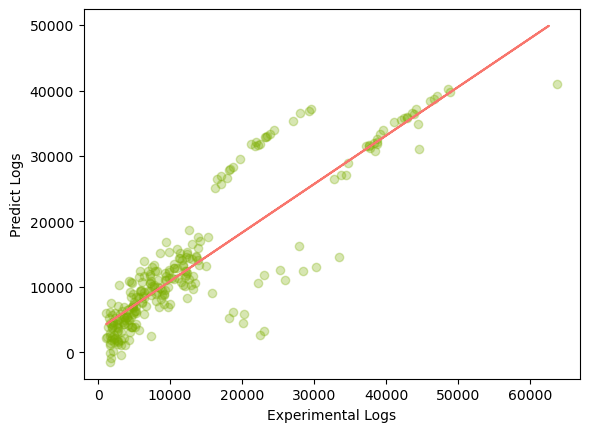

In [95]:
# Plotting the training and predicted datasets on chart
plt.scatter(y_test, y_preds, alpha=0.3, c='#7CAE00')
z= np.polyfit(y_train, y_train_preds, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Logs')
plt.xlabel('Experimental Logs')
plt.plot();

### 5b (ii). For the second model for all preditors

In [96]:
# Setting the train and testing data
X = Medical_Insurance.drop('medicalCost', axis=1)
y = Medical_Insurance['medicalCost']

In [97]:
# Separating into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# RandomForest
RF2 = RandomForestRegressor(n_estimators=100)

np.random.seed(42)

In [99]:
# Fit the model
rf_fit = RF2.fit(X_train, y_train)

In [100]:
# Checking the model score
rf_score = round(RF2.score(X_test, y_test)*100, 2)
rf_score

86.43

In [101]:
# Predict the outcome
ry_preds = rf_fit.predict(X_test)

In [102]:
r2_Score = round(r2_score(y_test, ry_preds), 2)

In [103]:
# Comparing the Actual and Predicted Value

pd.DataFrame({'Actual_Values': y_test, 'Predicted_Values': ry_preds})

,Actual_Values,Predicted_Values
764,9095.06825,11129.209807
887,5272.17580,5279.331531
890,29330.98315,28261.113596
1293,9301.89355,10712.517653
259,33750.29180,34526.701036
...,...,...
109,47055.53210,46998.878766
575,12222.89830,12403.443158
535,6067.12675,6361.954509
543,63770.42801,46753.924302


In [104]:
# RMSE 
Rf_RMSE = round(math.sqrt(metrics.mean_squared_error(y_test, ry_preds)), 2)
Rf_RMSE

4590.57

In [105]:
# Absolute error
R_Ab = round(metrics.mean_absolute_error(y_test, ry_preds), 2)
R_Ab

2533.67

In [106]:
yb_train_preds= RF2.predict(X_train)

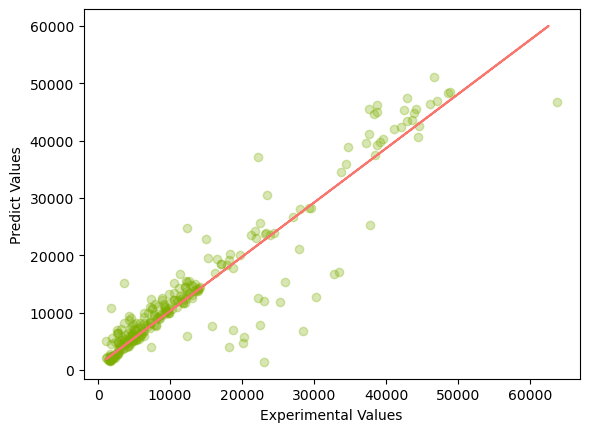

In [107]:
#Plotting the training and predicted datasets on chart
plt.scatter(y_test, ry_preds, alpha=0.3, c='#7CAE00')
z= np.polyfit(y_train, yb_train_preds, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Values')
plt.xlabel('Experimental Values')
plt.plot();

##### Statistical Summary of the Multivariate Model Predictor

In [108]:
B2_stat= [{"Model_Score %": rf_score,
    "Absolute_Mean_Error": R_Ab,
    "RMSE": Rf_RMSE,
    "R2_Score": r2_Score}]
B2_stat = pd.DataFrame(B2_stat)
B2_stat

,Model_Score %,Absolute_Mean_Error,RMSE,R2_Score
0,86.43,2533.67,4590.57,0.86


#### Statistical Summary 

In [109]:
B2_Stat = pd.DataFrame(['All', rf_score, r2_Score,
                          R_Ab, Rf_RMSE]).T

In [110]:
summ= pd.concat([B_Stat, B2_Stat])
summ.columns= ['Predictors', 'Model Score %', 'R2_score', 'Abosulte error', 'RMSE']
summary = summ.reset_index(drop=True)
summary

,Predictors,Model Score %,R2_score,Abosulte error,RMSE
0,Three (3),0.78,0.783,4186.51,5799.59
1,All,86.43,0.86,2533.67,4590.57


### In Conclusion

It can be seen that taking a multivariate model increases our model accuracy and predictions. When handling the three major predictors, the highest accuracy that we got was 82%, while when we treated the accuracy of the model with all the predictors, it can be seen that we had the highest model score which is 86% and the least Absolute Mean Error